[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana5/1_Series_No_Estacionarias.ipynb)

In [ ]:
import numpy as np
import math
import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

# Series de tiempo NO estacionarias

## Recordemos: Ruido Blanco

In [ ]:
mean = 0
std = 1
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)
samples

array([ 1.38535999e+00,  2.22995837e-01,  8.20798745e-02, -1.49956891e-01,
        3.15769927e-01,  9.60932299e-01,  4.01875736e-01,  1.22252567e+00,
       -1.79100010e-01, -2.16358294e-01,  6.17640458e-01,  9.70171222e-01,
       -1.18516082e+00, -7.88636984e-01, -1.97436315e+00, -9.90070330e-01,
        2.11339701e+00, -6.66625375e-01, -6.46868108e-01,  9.80136646e-02,
        1.01184575e+00, -5.71777776e-01, -5.27345816e-01,  2.01375274e-01,
        1.04060274e+00, -6.28265365e-01,  6.45404166e-01,  9.14428881e-01,
       -8.87423093e-02, -3.75901890e-01,  2.05952391e+00, -1.24931978e-01,
       -6.95399303e-01,  1.11322510e+00, -1.13947231e+00, -1.28511292e+00,
       -4.06233670e-01, -1.62559905e+00,  6.13578777e-02,  6.36613204e-01,
       -5.08016004e-01, -1.22369105e+00, -5.61742088e-01, -7.09956083e-01,
       -1.06123465e+00,  2.54238329e+00, -8.64704579e-01, -1.94945867e+00,
        9.58721525e-01,  2.19861635e-01,  1.40005184e-01,  1.81847768e+00,
       -5.96414443e-01, -

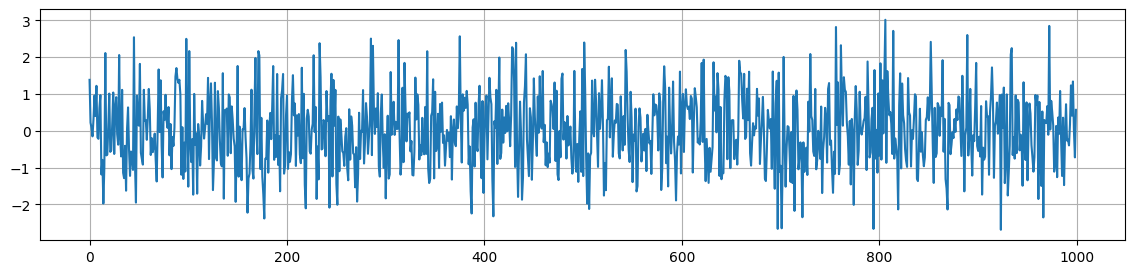

In [ ]:
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(samples)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
# El resultado es una lista, el 'p' valor esta en la posición '1'

# Vamos a ver si la serie de tiempo es NO estacionaria
# Hipotesis nula: Es NO estacionaria

# si tenemos un p-valor menos a 0.05, se rechaza la hipotesis nula

adfuller(samples)[1]

0.0

# Caminata aleatoria (misma probabilidad de +1 que de -1)

In [ ]:
def simulate_1d_rw(nsteps=500, p=0.5, stepsize=1):
    steps = [ 1*stepsize if np.random.random() < p else -1*stepsize for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = list(range(len(y)))

    return x, list(y)

In [ ]:
simulation_data = {}
nsims = 5
for i in range(nsims):
    x, y = simulate_1d_rw()
    simulation_data['x'] = x
    simulation_data['y{col}'.format(col=i)] = y

In [ ]:
# exploremos la salida
type(simulation_data)

dict

In [ ]:
simulation_data.keys()

dict_keys(['x', 'y0', 'y1', 'y2', 'y3', 'y4'])

In [ ]:
simulation_data

{'x': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,

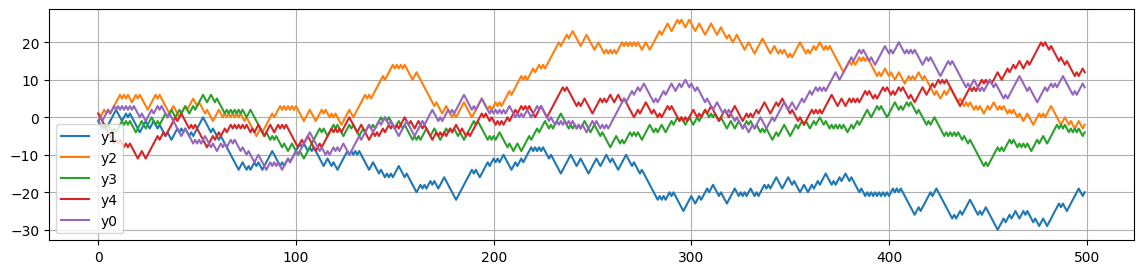

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(simulation_data['y1'], label='y1')
plt.plot(simulation_data['y2'], label='y2')
plt.plot(simulation_data['y3'], label='y3')
plt.plot(simulation_data['y4'], label='y4')
plt.plot(simulation_data['y0'], label='y0')
plt.legend()
plt.grid()

In [ ]:
adfuller(simulation_data['y1'])[1]

0.2232098748956471

In [ ]:
adfuller(simulation_data['y2'])[1]

0.6528390904178505

In [ ]:
adfuller(simulation_data['y3'])[1]

0.025332430090265312

In [ ]:
adfuller(simulation_data['y4'])[1]

0.5663406049102016

In [ ]:
adfuller(simulation_data['y0'])[1]

0.5733151252193058

Primer observación:

Pese a que todas estas realizaciones tienen el mismo comportamiento "probabilista" subyacente, pasará que cada ejecución es distinta casi siempre

## Ejercicio:
Recordando lo que es ser "estacionario" en series de tiempo, ¿como harían para tener una caminata aleatoria que sea NO estacionaria?

In [ ]:
# EJERCICIO
simulation_data = {}
nsims = 5
for i in range(nsims):
    x, y = simulate_1d_rw(p=0.9)
    simulation_data['x'] = x
    simulation_data['y{col}'.format(col=i)] = y


# Vean el resultado que arroja el test
print(adfuller(simulation_data['y0'])[1])
print(adfuller(simulation_data['y1'])[1])
print(adfuller(simulation_data['y2'])[1])
print(adfuller(simulation_data['y3'])[1])
print(adfuller(simulation_data['y4'])[1])

0.9980204226725182
0.1750114212972872
0.891656556388984
0.3679348750340141
0.6946727468777776


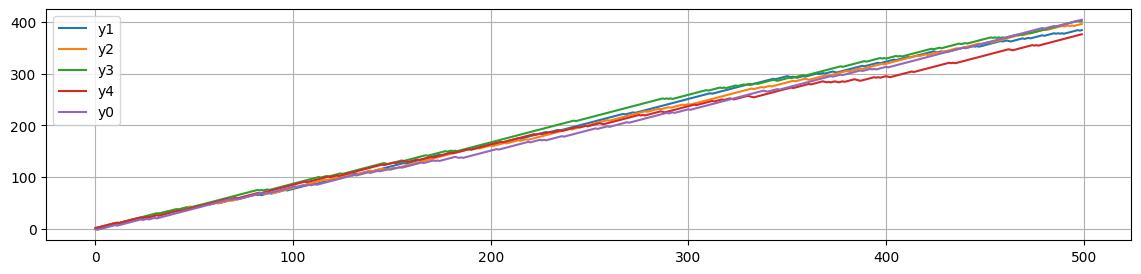

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(simulation_data['y1'], label='y1')
plt.plot(simulation_data['y2'], label='y2')
plt.plot(simulation_data['y3'], label='y3')
plt.plot(simulation_data['y4'], label='y4')
plt.plot(simulation_data['y0'], label='y0')
plt.legend()
plt.grid()

In [ ]:
simulation_data

{'x': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,

In [ ]:
# Como convertirian los datos anteriores a un DataFrame

pd.DataFrame(simulation_data)

,x,y0,y1,y2,y3,y4
0,0,-1,1,1,1,1
1,1,-2,2,2,2,2
2,2,-1,3,3,3,3
3,3,0,4,4,2,4
4,4,1,5,5,3,5
...,...,...,...,...,...,...
495,495,400,382,392,400,372
496,496,401,383,393,401,373
497,497,402,384,394,402,374
498,498,403,383,395,401,375


# Movimiento Browniano

Es un proceso estocástico con las siguientes propiedades:
- Inicia en cero
- $W_t$ tiene incrementos independientes
- $W_t - W_s$ se comporta como unas normal con media 0 y desviación estándar $t-s$

In [ ]:
np.random.seed(1000)

In [ ]:
def simulate_1d_bm(nsteps=1000, t=0.01):
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

In [ ]:
nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_bm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

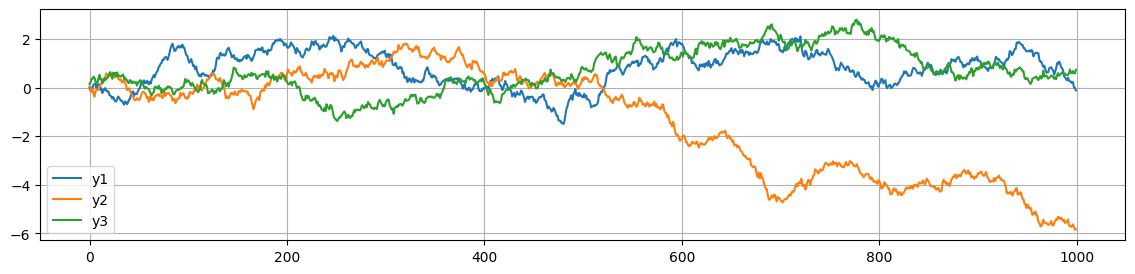

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(simulation_data['y1'], label='y1')
plt.plot(simulation_data['y2'], label='y2')
plt.plot(simulation_data['y3'], label='y3')
plt.legend()
plt.grid()

## Perfecto ejemplo de que puede pasar con los test a series de tiempo

In [ ]:
adfuller(simulation_data['y1'])[1]

0.12736017849079795

In [ ]:
adfuller(simulation_data['y2'])[1]

0.9875548205353979

In [ ]:
adfuller(simulation_data['y3'])[1]

0.4682589837800437

# Movimiento browniano con "drift"

Es una transformación en la que si $X(t)$ es un movimiento browniano, se le agrega un termino llamado "drift" (en español se le conoce como "deriva"):

$$U(t) = X(t) + \mu t$$

In [ ]:
def simulate_1d_bm_with_drift(nsteps=1000, t=0.01, mu=0.5):
    steps = [ mu*t + np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

In [ ]:
nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_bm_with_drift(mu=-2)
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

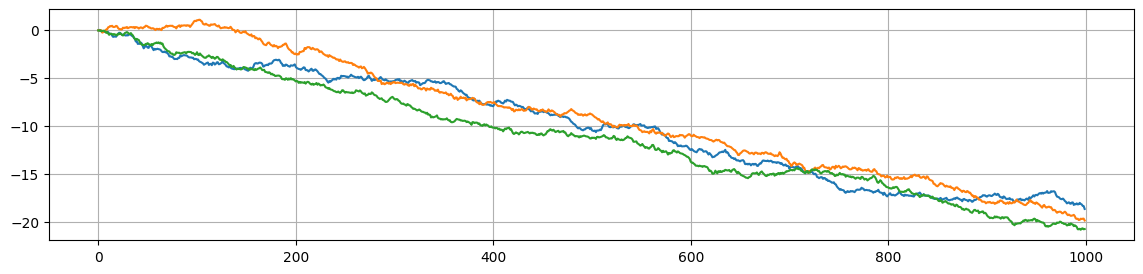

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(simulation_data['y1'])
plt.plot(simulation_data['y2'])
plt.plot(simulation_data['y3'])
plt.grid()

In [ ]:
adfuller(simulation_data['y2'])[1]

0.9818414821779565

# Movimiento Browniano Geométrico

Este tipo de modelo es muy utilizado para la predicción de precios de opciones (se verá algunas semanas mas adelante)

Se ve del siguiente modo:

$$ G(t) = G(0) exp\left[(\mu - \frac{1}{2}\sigma^{2}) + \sigma X(t) \right] $$

$ G(t)$ no es movimiento browniano, pero $log(G(t))$ si lo es, pues:

$$ log [ G(t) ] = log[G(0)] + (\mu - \frac{1}{2}\sigma^{2}) + \sigma X(t) $$

Propiedad: Cuando el logaritmo del precio de un activo sigue un movimiento browniano, se asume que los rendimientos logarítmicos son distribuidos normalmente.

In [ ]:
def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps) ]
    y = np.exp(np.cumsum(steps))
    x = [ t*i for i in range(nsteps) ]
    return x, y

In [ ]:
nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_gbm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

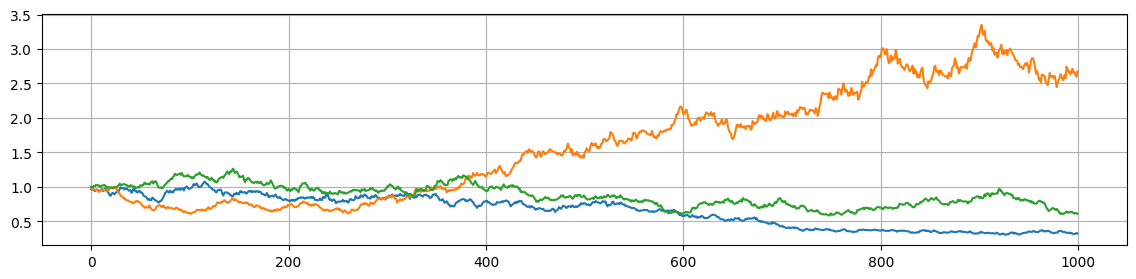

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(simulation_data['y1'])
plt.plot(simulation_data['y2'])
plt.plot(simulation_data['y3'])
plt.grid()

# Ejercicios:
- Cree un serie de tiempo estacionaria utilizando funciones conocidas (rectas, parábolas, funciones trigonométricas, etc)

- Cree una NO estacionaria (si es una modificación de la anterior, sería mejor)

Utilice semillas aleatorias para poder repetir el experimento, en base a esto

- CREE una serie de tiempo, que al utilizar una semillas aleatoria parezca ESTACIONARIA y al utilizar otra semilla parezca NO ESTACIONARIA

# Series de tiempo financieras

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "GOOG AAPL IBM MSFT PFE NFLX",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
data

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,GOOG,IBM,MSFT,NFLX,PFE
Date,,,,,,
2023-05-08,172.578827,108.239998,117.930168,306.137451,331.209991,36.777752
2023-05-09,170.858017,107.940002,117.378006,304.500885,332.140015,36.597054
2023-05-10,172.638504,112.279999,118.201401,309.767639,335.420013,36.425858
2023-05-11,172.827499,116.900002,117.116455,307.585571,344.760010,36.127842
2023-05-12,171.891190,117.919998,118.995743,306.454834,339.890015,35.906723
...,...,...,...,...,...,...
2024-05-01,169.300003,165.570007,164.429993,394.940002,551.710022,27.180000
2024-05-02,173.029999,168.460007,164.690002,397.839996,565.150024,27.700001
2024-05-03,183.380005,168.990005,165.710007,406.660004,579.340027,27.809999


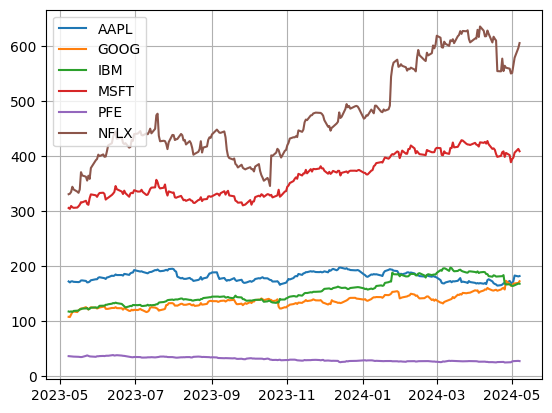

In [ ]:
plt.plot(data['AAPL'], label='AAPL')
plt.plot(data['GOOG'], label='GOOG')
plt.plot(data['IBM'], label='IBM')
plt.plot(data['MSFT'], label='MSFT')
plt.plot(data['PFE'], label='PFE')
plt.plot(data['NFLX'], label='NFLX')
plt.legend()
plt.grid()

In [ ]:
adfuller(data['AAPL'])[1]

0.0975172704765489

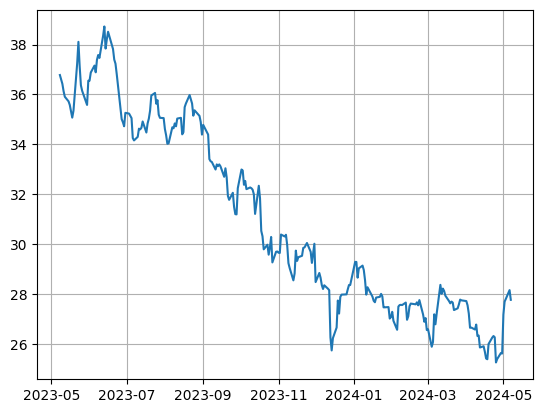

In [ ]:
plt.plot(data['PFE'])
plt.grid()

# ¿Como se ven los test de Dickey-Fuller de todos los activos?

In [ ]:
# EJERCICIO


# ¿Pueden encontrar alguna parte de las series que parezca ESTACIONARIA o algún activo fuera de los 6 mencionados que si lo sea?

In [ ]:
# EJERCICIO

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^IRX",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
data = pd.DataFrame(data)

In [ ]:
data

In [ ]:
plt.plot(data)

In [ ]:
data = data[data.index > pd.to_datetime('2010-02-01')]
data = data[data.index < pd.to_datetime('2011-01-01')]

In [ ]:
plt.plot(data)

In [ ]:
adfuller(data)[1]